In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data
email_table = pd.read_csv('data/email_table.csv')
email_opened_table = pd.read_csv('data/email_opened_table.csv')
link_clicked_table = pd.read_csv('data/link_clicked_table.csv')

# Display the first 5 rows of each table to understand structure
print("Email Table Preview:")
print(email_table.head())
print("------------------------------------------------------------------")
print("\nEmail Opened Table Preview:")
print(email_opened_table.head())
print("------------------------------------------------------------------")
print("\nLink Clicked Table Preview:")
print(link_clicked_table.head())

Email Table Preview:
   email_id   email_text email_version  hour    weekday user_country  \
0     85120  short_email  personalized     2     Sunday           US   
1    966622   long_email  personalized    12     Sunday           UK   
2    777221   long_email  personalized    11  Wednesday           US   
3    493711  short_email       generic     6     Monday           UK   
4    106887   long_email       generic    14     Monday           US   

   user_past_purchases  
0                    5  
1                    2  
2                    2  
3                    1  
4                    6  
------------------------------------------------------------------

Email Opened Table Preview:
   email_id
0    284534
1    609056
2    220820
3    905936
4    164034
------------------------------------------------------------------

Link Clicked Table Preview:
   email_id
0    609056
1    870980
2    935124
3    158501
4    177561


In [5]:
print("Shape of email_table : ",email_table.shape)
print("Shape of email_opened_table : ",email_opened_table.shape)
print("Shape of link_clicked_table : ",link_clicked_table.shape)

Shape of email_table :  (100000, 7)
Shape of email_opened_table :  (10345, 1)
Shape of link_clicked_table :  (2119, 1)


In [6]:
# Creating binary indicators for opened and clicked emails
email_table['opened'] = email_table['email_id'].isin(email_opened_table['email_id']).astype(int)
email_table['clicked'] = email_table['email_id'].isin(link_clicked_table['email_id']).astype(int)

In [7]:
email_table['opened'].value_counts()

opened
0    89655
1    10345
Name: count, dtype: int64

In [8]:
email_table['clicked'].value_counts()

clicked
0    97881
1     2119
Name: count, dtype: int64

In [10]:
# Ensuring all emails in clicked are also in opened (data consistency check)
clicked_not_opened = email_table[(email_table['clicked'] == 1) & (email_table['opened'] == 0)]
if len(clicked_not_opened) > 0:
    print(f"Warning: {len(clicked_not_opened)} emails were clicked but not marked as opened.")

In [11]:
# Fixing data inconsistency by marking clicked email as opened
email_table.loc[email_table['clicked'] == 1, 'opened'] = 1

In [13]:
# Now this code should not print any warnings as we have fixed the inconsistency in the above cell
clicked_not_opened = email_table[(email_table['clicked'] == 1) & (email_table['opened'] == 0)]
if len(clicked_not_opened) > 0:
    print(f"Warning: {len(clicked_not_opened)} emails were clicked but not marked as opened.")

Insights :
Dataset shows that some link has been clicked by the customer but it was not opened by them, so this was the case of data inconistency. Fixed it by marking clicked email as opened

In [16]:
# Check for missing values
print("Missing values in email_table:")
print(email_table.isnull().sum())

print("--------------------------------------------------------------")

# Check data types
print("\nData types in email_table:")
print(email_table.dtypes)

Missing values in email_table:
email_id               0
email_text             0
email_version          0
hour                   0
weekday                0
user_country           0
user_past_purchases    0
opened                 0
clicked                0
dtype: int64
--------------------------------------------------------------

Data types in email_table:
email_id                int64
email_text             object
email_version          object
hour                    int64
weekday                object
user_country           object
user_past_purchases     int64
opened                  int64
clicked                 int64
dtype: object


Insights :
1. Dataset has 0 missing values
2. It has numerical as well as categorical columns

In [18]:
# Basic statistics using describe()
print("Basic statistics for numerical columns:")
print(email_table.describe())

print("--------------------------------------------------------------")

# Concise summary of the DataFrame using info()
print("\nConcise summary of email_table:")
print(email_table.info())

Basic statistics for numerical columns:
            email_id           hour  user_past_purchases         opened  \
count  100000.000000  100000.000000         100000.00000  100000.000000   
mean   498690.196160       9.059300              3.87845       0.103950   
std    289230.727534       4.439637              3.19611       0.305197   
min         8.000000       1.000000              0.00000       0.000000   
25%    246708.250000       6.000000              1.00000       0.000000   
50%    498447.000000       9.000000              3.00000       0.000000   
75%    749942.750000      12.000000              6.00000       0.000000   
max    999998.000000      24.000000             22.00000       1.000000   

             clicked  
count  100000.000000  
mean        0.021190  
std         0.144018  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  
--------------------------------------------------------------

Concise summa

In [19]:
numerical_cols = email_table.select_dtypes(include=['int64']).columns.tolist()
categorical_cols = email_table.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical columns:")
print(numerical_cols)
print("\nCategorical columns:")
print(categorical_cols)


Numerical columns:
['email_id', 'hour', 'user_past_purchases', 'opened', 'clicked']

Categorical columns:
['email_text', 'email_version', 'weekday', 'user_country']


In [20]:
# Unique values for categorical columns
print("Unique values in categorical columns:")
for col in ['email_text', 'email_version', 'weekday', 'user_country']:
    print(f"{col}: {email_table[col].unique()}")

Unique values in categorical columns:
email_text: ['short_email' 'long_email']
email_version: ['personalized' 'generic']
weekday: ['Sunday' 'Wednesday' 'Monday' 'Saturday' 'Friday' 'Tuesday' 'Thursday']
user_country: ['US' 'UK' 'FR' 'ES']


1. 2 unique values in email_text & email_version , therefore binary encoding
2. In weekday, we can apply ordinal encoding
3. In user_country , we can try one-hot encoding

### Calculating Performance Metrics

In [22]:
# Calculating key performance metrics from the marketing team perspective
total_emails = len(email_table)
opened_emails = email_table['opened'].sum()
clicked_emails = email_table['clicked'].sum()

open_rate = opened_emails / total_emails * 100
ctr = clicked_emails / total_emails * 100
ctor = clicked_emails / opened_emails * 100 if opened_emails > 0 else 0

print(f"Total emails sent: {total_emails}")
print(f"Number of opened emails: {opened_emails}")
print(f"Open Rate: {open_rate:.2f}%")
print(f"Number of clicked emails: {clicked_emails}")
print(f"Click-Through Rate (CTR): {ctr:.2f}%")
print(f"Click-to-Open Rate (CTOR): {ctor:.2f}%")

Total emails sent: 100000
Number of opened emails: 10395
Open Rate: 10.39%
Number of clicked emails: 2119
Click-Through Rate (CTR): 2.12%
Click-to-Open Rate (CTOR): 20.38%


#### Insights & Interpretations : 
##### ✅ 1. What’s Working Well:
1. Good CTOR (Click-to-Open Rate) at 20.38%:

- This indicates that once people open the email, a decent percentage (1 in 5) are actually interested enough to click on the link.

- This suggests that the email content and CTA (Call-To-Action) are relevant and compelling.

##### ❌ 2. Areas of Concern:
1. Low Open Rate (10.39%)

- Only 1 in 10 users opened the email. That means ~90% of recipients ignored it.

- This suggests a weak subject line, poor sender reputation, or users being uninterested in the topic at first glance.

2. Low CTR (2.12%)

- The ultimate goal was to get users to click. Only ~2 in 100 did so.

- While CTOR is strong, the overall impact is limited due to the low open rate.

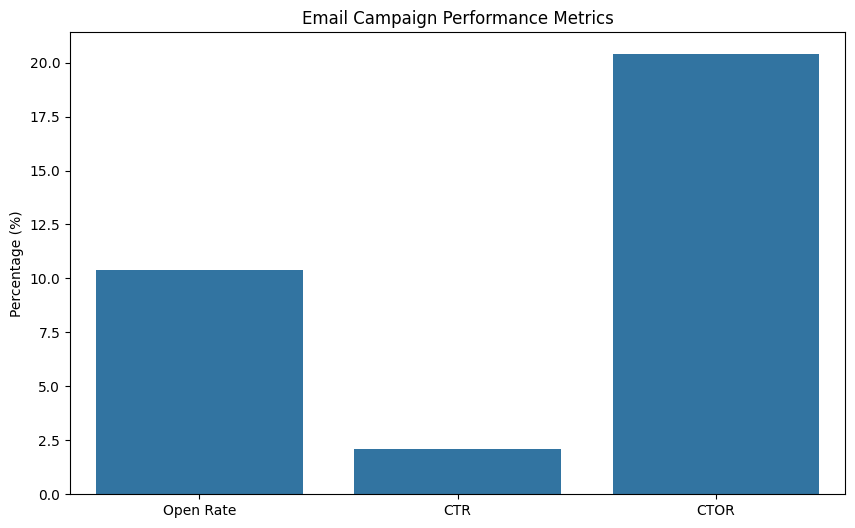

In [24]:
# Visualizing the above key performance metrics
metrics = ['Open Rate', 'CTR', 'CTOR']
values = [open_rate, ctr, ctor]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values)
plt.title('Email Campaign Performance Metrics')
plt.ylabel('Percentage (%)')
plt.savefig('email_metrics.png', dpi=300, bbox_inches='tight')
plt.show()